<h1 style="text-align: center;"><u>Extracting Tables from a PDF File</u></h1>
<h2 style="text-align: center;">Augusta, Georgia</h2>
<h3 style="text-align: center;">Fiscal Year 2022</h3>
<h3 style="text-align: center;">Adopted Budget Detail Revenue Report</h3>
<h5 style="text-align: center;">For Years 2019 - 2022</h5>
<h5 style="text-align: center;">As of 12/31/2021</h5>

## Table of Contents
1. [Introduction](#introduction)
2. [Installing Required Libraries](#libraries)
   
   - [PyPDF](#pypdf)
   - [Camelot](#camelot)
      - [Ghostscript](#camelot)
      - [Tkinter](#camelot)
   - [Matplotlib](#matplotlib)
   - [Pandas](#pandas)
   - [NumPy](#numpy)
3. [Table Extraction](#extraction)
4. [Create a Pandas Dataframe](#dataframe)
5.  [Data Cleaning](#cleaning)
6.  [Data Validation](#validation)
7.  [Data Export](#export)

###### Note: This notebook was created using Python version 3.11.8

In [375]:
import platform
print(platform.python_version())

3.11.8


## <div id='introduction'/> 1. Introduction

The purpose of this notebook is to extract Detail Revenue Report financial tables from the Augusta, Georgia fiscal year 2022 adopted city budget PDF file.

## <div id='libraries'/>2. Installing Required Libraries

This section covers the libraries and dependencies required to run the notebook.

##### <div id='pypdf'/>**PyPDF2**

[PyPDF2](https://pypdf2.readthedocs.io/en/3.0.0/) is a free and open source pure-python PDF library capable of splitting, merging, cropping, and transforming the pages of PDF files. It can also add custom data, viewing options, and passwords to PDF files. PyPDF2 can retrieve text and metadata from PDFs as well.

- `pip install PyPDF2<3.0`

###### Note: pdffilereader is deprecated and was removed in pypdf2 3.0.0. To address this issue, install a compatible version of PyPDF2. This can be done by including "<3.0" in `pip install PyPDF2` as shown above.

In [376]:
import PyPDF2
print("PyPDF2==" + PyPDF2.__version__)

PyPDF2==2.12.1


##### <div id='camelot'/>**Camelot**
[Camelot](https://camelot-py.readthedocs.io/en/master/) is a Python library for extracting tables from PDFs.

The following [dependencies](https://camelot-py.readthedocs.io/en/master/user/install-deps.html#install-deps) must be installed for the Camelot library to work properly:

  - <b>Ghostscript</b>
  - <b>Tkinter</b>

Install the above required dependencies and then [install Camelot](https://camelot-py.readthedocs.io/en/master/user/install.html#install).

- `pip install camelot-py[cv]`
- `pip install camelot-py[plot]`

##### <div id='matplotlib'/> **Matplotlib**

Visual debugging using plot() requires [Matplotlib](https://matplotlib.org/) which is an optional dependency.

- `pip install matplotlib`

##### <div id='pandas'/>**Pandas**

[Pandas](https://pandas.pydata.org/) is a Python library for data manipulation and analysis.

- `pip install pandas`

##### <div id='numpy'/>**NumPy**

[NumPy](https://numpy.org/) is a Python library used for scientific computing.

- `pip install numpy`

##### Import Libraries

In [377]:
import camelot
import tkinter
import matplotlib
import pandas as pd
import numpy as np

## <div id='extraction'/> 3. Table Extraction`

In [378]:
file = "PDF_FY2022_Adopted_Budget.pdf"
tables = camelot.read_pdf(file, pages='4-140',
                          flavor='stream',
                          table_areas=['0,500,800,50'])
print("Total tables extracted:", tables.n)

Total tables extracted: 137


##### Visual Debugging

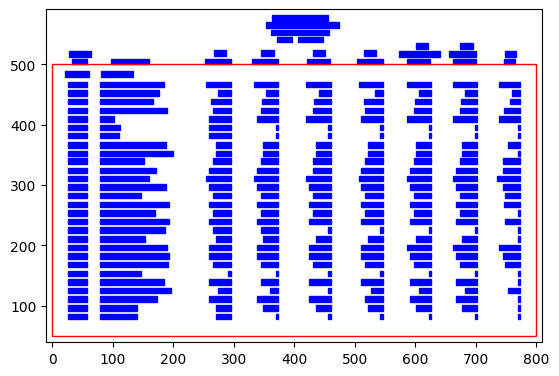

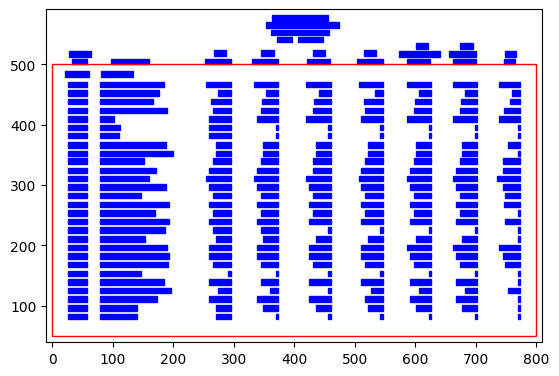

In [379]:
camelot.plot(tables[0], kind='contour')

##### Parsing Report

In [380]:
# Print table parsing reports
for table in tables:
    print(table.parsing_report)

{'accuracy': 100.0, 'whitespace': 2.68, 'order': 1, 'page': 4}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 5}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 6}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 7}
{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 8}
{'accuracy': 100.0, 'whitespace': 21.69, 'order': 1, 'page': 9}
{'accuracy': 100.0, 'whitespace': 26.46, 'order': 1, 'page': 10}
{'accuracy': 100.0, 'whitespace': 25.93, 'order': 1, 'page': 11}
{'accuracy': 100.0, 'whitespace': 22.75, 'order': 1, 'page': 12}
{'accuracy': 100.0, 'whitespace': 24.34, 'order': 1, 'page': 13}
{'accuracy': 100.0, 'whitespace': 31.58, 'order': 1, 'page': 14}
{'accuracy': 100.0, 'whitespace': 30.99, 'order': 1, 'page': 15}
{'accuracy': 100.0, 'whitespace': 10.14, 'order': 1, 'page': 16}
{'accuracy': 100.0, 'whitespace': 25.73, 'order': 1, 'page': 17}
{'accuracy': 100.0, 'whitespace': 28.04, 'order': 1, 'page': 18}
{'accuracy': 99.69, 'whitespace': 20.0, 

##### Dimensions

In [381]:
# Print number of table rows and columns
for table in tables:
    print(table)

<Table shape=(29, 9)>
<Table shape=(29, 9)>
<Table shape=(29, 9)>
<Table shape=(29, 9)>
<Table shape=(29, 9)>
<Table shape=(21, 9)>
<Table shape=(21, 9)>
<Table shape=(21, 9)>
<Table shape=(21, 9)>
<Table shape=(21, 9)>
<Table shape=(19, 9)>
<Table shape=(19, 9)>
<Table shape=(23, 9)>
<Table shape=(19, 9)>
<Table shape=(21, 9)>
<Table shape=(10, 9)>
<Table shape=(12, 9)>
<Table shape=(8, 9)>
<Table shape=(7, 9)>
<Table shape=(6, 9)>
<Table shape=(4, 9)>
<Table shape=(10, 9)>
<Table shape=(10, 9)>
<Table shape=(8, 9)>
<Table shape=(7, 9)>
<Table shape=(6, 9)>
<Table shape=(7, 9)>
<Table shape=(5, 9)>
<Table shape=(8, 9)>
<Table shape=(3, 9)>
<Table shape=(18, 9)>
<Table shape=(12, 9)>
<Table shape=(24, 9)>
<Table shape=(22, 9)>
<Table shape=(21, 9)>
<Table shape=(19, 9)>
<Table shape=(19, 9)>
<Table shape=(20, 9)>
<Table shape=(19, 9)>
<Table shape=(19, 9)>
<Table shape=(19, 9)>
<Table shape=(19, 9)>
<Table shape=(19, 9)>
<Table shape=(21, 9)>
<Table shape=(12, 9)>
<Table shape=(22, 9)>

## <div id='dataframe'/>4. Create a Pandas Dataframe

In [382]:
dfs = []  # list to store dataframes
for table in tables:
    df = table.df # Convert tables to dataframes
    df.columns = df.columns.astype(str) # Convert column names to string
    
    # Rename columns
    df.columns.values[0] = 'object_code'
    df.columns.values[1] = 'object_description'
    df.columns.values[2] = '2019_actuals'
    df.columns.values[3] = '2020_actuals'
    df.columns.values[4] = '2021_budget'
    df.columns.values[5] = '2021_actuals'
    df.columns.values[6] = '2022_proposed_budget'
    df.columns.values[7] = '2022_adopted_budget'

    df.drop(columns=df.columns[8:10], inplace=True) # Drop last two columns
    dfs.append(df)

df = pd.concat(dfs, axis=0)  # concatenate all dataframes in list 
df = df.reset_index(drop=True) # Reset index
df.replace(r'', np.nan, regex=True, inplace=True) # Fill missing values with NaN

In [383]:
df.shape # Count number of row and columns

(1774, 8)

In [384]:
df.dtypes # Check data types

object_code             object
object_description      object
2019_actuals            object
2020_actuals            object
2021_budget             object
2021_actuals            object
2022_proposed_budget    object
2022_adopted_budget     object
dtype: object

In [385]:
df.tail()

,object_code,object_description,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget
1769,3952110,Fund Balance Appropriations,0,0,"1,101,340",0,"1,100,000","1,100,000"
1770,951000000,URA Foundry Project,"442,955","1,145,379","1,101,340",NaN,"1,100,000","1,100,000"
1771,951071120,Foundry Project,NaN,NaN,NaN,NaN,NaN,NaN
1772,3811110,Sale of contraband property,0,0,0,0,0,0
1773,FUND TOTAL:,951\nURA Foundry Project,"442,955","1,145,379","1,101,340",0,"1,100,000","1,100,000"


##### Import fund labels from summary report to create data dictionary for additional columns

In [386]:
labels = pd.read_csv('Adopted_Budget_Summary_by_Fund_FY2022.csv',
                     usecols = ['fund_number',
                                'fund_name',
                                'fund_category'])
labels.head()

,fund_number,fund_name,fund_category
0,101,General Fund,GENERAL FUNDS
1,273,Law Enforcement,GENERAL FUNDS
2,104,Port Authority,GENERAL FUNDS
3,131,IT Radio System,GENERAL FUNDS
4,160,Traffic Mitigation,GENERAL FUNDS


#### Add Fund Number Column

In [387]:
df.loc[df['object_code'].str.len() == 9, 'fund_number'] = df.object_code.str[:3] # Insert fund number column
df = df[df["object_code"].str.contains("FUND TOTAL:") == False].reset_index(drop=True) # Delete "FUND TOTAL:" rows
df['fund_number'].ffill(inplace=True) # Forward fill fund numbers to replace NaN values
df['fund_number'] = df['fund_number'].astype(int) # Convert data type to integer
df.head()

,object_code,object_description,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget,fund_number
0,101000000,General Fund,NaN,NaN,NaN,NaN,NaN,NaN,101
1,3111110,Real Property Tax-Curr Year,"12,579,623","12,339,879","11,403,230","11,784,350","12,722,090","12,722,090",101
2,3111310,Timber Tax - Current Year,"2,879","4,395","2,720",684,"2,960","2,960",101
3,3111810,Early Payment Discount,"-101,550","-97,424","-89,410","-428,834","-90,060","-90,060",101
4,3113110,Motor Vehicles - Current Year,"208,880","196,751","143,930","230,775","120,580","120,580",101


#### Add Fund Name Column

In [388]:
fund_name_dict = pd.Series(labels.fund_name.values, index=labels.fund_number).to_dict() # Create fund name dictionary from labels dataframe
df['fund_name'] = df['fund_number'].map(fund_name_dict) # Map fund names to fund numbers
print(fund_name_dict)
df.head()

{101: 'General Fund', 273: 'Law Enforcement', 104: 'Port Authority', 131: 'IT Radio System', 160: 'Traffic Mitigation', 203: 'Life Skills Mentoring Court', 204: 'DUI Court', 205: 'Drug Court', 206: 'Law Library', 207: "5% Crime Victim's Asst Program", 208: 'Supplemental Juvenile Services', 209: 'DA 5% CVAP', 211: 'Federal Drug Forfeitures', 212: 'State Drug Forfeitures', 216: 'Emergency Telephone Response', 217: 'Building Inspections Fund', 220: 'Grants', 221: 'Housing & Neighborhood Development', 230: 'ARPA - City', 231: 'Board of Appeals', 232: 'ARPA - County', 235: 'TSPLOST 25% Discretionary', 261: 'NPDES Permit Fees', 271: 'Urban Services District', 272: 'Capital Outlay', 274: 'Fire Protection', 275: 'Occupation Tax', 276: 'Street Lights', 277: 'Downtown Development Authority', 278: 'Sheriff Capital Outlay Grant', 281: 'Convention Center', 292: 'TAD 2', 293: 'TAD 3', 294: 'TAD 4', 296: 'Promotion Richmond County', 297: 'Transportation and Tourism', 298: 'Urban Redevelopment Project

,object_code,object_description,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget,fund_number,fund_name
0,101000000,General Fund,NaN,NaN,NaN,NaN,NaN,NaN,101,General Fund
1,3111110,Real Property Tax-Curr Year,"12,579,623","12,339,879","11,403,230","11,784,350","12,722,090","12,722,090",101,General Fund
2,3111310,Timber Tax - Current Year,"2,879","4,395","2,720",684,"2,960","2,960",101,General Fund
3,3111810,Early Payment Discount,"-101,550","-97,424","-89,410","-428,834","-90,060","-90,060",101,General Fund
4,3113110,Motor Vehicles - Current Year,"208,880","196,751","143,930","230,775","120,580","120,580",101,General Fund


#### Add Org Key Column

In [389]:
df.loc[df['object_code'].str.len() == 9, 'org_key'] = df.object_code # Insert org key column
df['org_key'].ffill(inplace=True) # Forward fill org key to replace NaN values

#### Add Department Name Column

In [390]:
department_dict = pd.Series(df.object_description.values, index=df.object_code).to_dict() # Create department dictionary from object codes and descriptions
df['department'] = df['org_key'].map(department_dict) # Map department to org keys
df = df[df['object_code'].map(len) < 9] # Remove rows with org keys in object code column
df = df.reset_index(drop=True) # Reset index
print(department_dict)
df.head()

{'101000000': 'General Fund', '3111110': 'Real Property Tax-Curr Year', '3111310': 'Timber Tax - Current Year', '3111810': 'Early Payment Discount', '3113110': 'Motor Vehicles - Current Year', '3113150': 'TAVT', '3113151': 'TAVT-L', '3113152': 'TAVT-S', '3113210': 'Mobile Homes - Current Year', '3113310': 'Rail Road Equipment-Current Yr', '3116110': 'Real Estate Transfer', '3116120': 'Recording Intangible Tax', '3117110': 'Electric Franchise Tax', '3117210': 'Water Franchise Tax (In Lieu)', '3117310': 'Gas Franchise Tax', '3117510': 'Television Cable Franchise Tax', '3117610': 'Telephone Franchise Tax', '3117710': 'Waste Mgmt Franchise In Lieu.', '3117810': 'Stormwater Franchise In Lieu', '3117910': 'Other Franchise Tax', '3131110': 'Local Option Sales & Use Tax', '3142110': 'Alcoholic Beverage Excise Tax', '3143110': 'Local Option Mixed Drink Tax', '3145110': 'Energy Excise Tax', '3191110': 'Penalities - Delinquent Taxes', '3195110': 'Pen & Int-Fi Fa-Lot CleanupFee', '3211110': 'Alcoh

,object_code,object_description,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget,fund_number,fund_name,org_key,department
0,3111110,Real Property Tax-Curr Year,"12,579,623","12,339,879","11,403,230","11,784,350","12,722,090","12,722,090",101,General Fund,101000000,General Fund
1,3111310,Timber Tax - Current Year,"2,879","4,395","2,720",684,"2,960","2,960",101,General Fund,101000000,General Fund
2,3111810,Early Payment Discount,"-101,550","-97,424","-89,410","-428,834","-90,060","-90,060",101,General Fund,101000000,General Fund
3,3113110,Motor Vehicles - Current Year,"208,880","196,751","143,930","230,775","120,580","120,580",101,General Fund,101000000,General Fund
4,3113150,TAVT,"6,009,796","9,272,792","10,268,080","9,983,427","11,700,000","11,700,000",101,General Fund,101000000,General Fund


#### Add Fund Category Column

In [391]:
fund_cat_dict = pd.Series(labels.fund_category.values, index=labels.fund_number).to_dict() # Create fund category dictionary from labels dataframe
df['fund_category'] = df['fund_number'].map(fund_cat_dict) # Map fund categories to fund numbers
print(fund_cat_dict)

{101: 'GENERAL FUNDS', 273: 'GENERAL FUNDS', 104: 'GENERAL FUNDS', 131: 'GENERAL FUNDS', 160: 'GENERAL FUNDS', 203: 'SPECIAL REVENUE FUNDS', 204: 'SPECIAL REVENUE FUNDS', 205: 'SPECIAL REVENUE FUNDS', 206: 'SPECIAL REVENUE FUNDS', 207: 'SPECIAL REVENUE FUNDS', 208: 'SPECIAL REVENUE FUNDS', 209: 'SPECIAL REVENUE FUNDS', 211: 'SPECIAL REVENUE FUNDS', 212: 'SPECIAL REVENUE FUNDS', 216: 'SPECIAL REVENUE FUNDS', 217: 'SPECIAL REVENUE FUNDS', 220: 'SPECIAL REVENUE FUNDS', 221: 'SPECIAL REVENUE FUNDS', 230: 'SPECIAL REVENUE FUNDS', 231: 'SPECIAL REVENUE FUNDS', 232: 'SPECIAL REVENUE FUNDS', 235: 'SPECIAL REVENUE FUNDS', 261: 'SPECIAL REVENUE FUNDS', 271: 'SPECIAL REVENUE FUNDS', 272: 'SPECIAL REVENUE FUNDS', 274: 'SPECIAL REVENUE FUNDS', 275: 'SPECIAL REVENUE FUNDS', 276: 'SPECIAL REVENUE FUNDS', 277: 'SPECIAL REVENUE FUNDS', 278: 'SPECIAL REVENUE FUNDS', 281: 'SPECIAL REVENUE FUNDS', 292: 'SPECIAL REVENUE FUNDS', 293: 'SPECIAL REVENUE FUNDS', 294: 'SPECIAL REVENUE FUNDS', 296: 'SPECIAL REVEN

#### Add Report Date Column

In [392]:
df['report_date'] = pd.Timestamp('2021-12-31').strftime('%Y-%m-%d')

In [393]:
df.head()

,object_code,object_description,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget,fund_number,fund_name,org_key,department,fund_category,report_date
0,3111110,Real Property Tax-Curr Year,"12,579,623","12,339,879","11,403,230","11,784,350","12,722,090","12,722,090",101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31
1,3111310,Timber Tax - Current Year,"2,879","4,395","2,720",684,"2,960","2,960",101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31
2,3111810,Early Payment Discount,"-101,550","-97,424","-89,410","-428,834","-90,060","-90,060",101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31
3,3113110,Motor Vehicles - Current Year,"208,880","196,751","143,930","230,775","120,580","120,580",101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31
4,3113150,TAVT,"6,009,796","9,272,792","10,268,080","9,983,427","11,700,000","11,700,000",101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31


In [394]:
df[245:250]

,object_code,object_description,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget,fund_number,fund_name,org_key,department,fund_category,report_date
245,3911230,Oper Trf fr ARPA-City,0,0,270,270,0,0,104,Port Authority,104000000,Port Authority,GENERAL FUNDS,2021-12-31
246,3952110,Fund Balance Appropriations,0,0,"56,400",0,"63,220","63,220",104,Port Authority,104000000,Port Authority,GENERAL FUNDS,2021-12-31
247,3831110,Rents and royalties,"32,700","32,475","34,100","41,114","34,100","34,100",104,Port Authority,104061711,Marina,GENERAL FUNDS,2021-12-31
248,3831110,Rents and royalties,"16,800","15,255","16,800","16,135","16,800","16,800",104,Port Authority,104061712,Augusta Port Authority,GENERAL FUNDS,2021-12-31
249,3495110,Subscriber Maintenance,0,"198,155","210,000","204,450","210,000","210,000",131,IT Radio System,131000000,IT/Radio System,GENERAL FUNDS,2021-12-31


In [395]:
df.columns # View columns

Index(['object_code', 'object_description', '2019_actuals', '2020_actuals',
       '2021_budget', '2021_actuals', '2022_proposed_budget',
       '2022_adopted_budget', 'fund_number', 'fund_name', 'org_key',
       'department', 'fund_category', 'report_date'],
      dtype='object')

In [396]:
df.shape # Count numbers of rows and columns

(1062, 14)

## <div id='cleaning'/> 5. Data Cleaning

##### Check dataframe for null values

In [397]:
df.isnull().sum()

object_code              0
object_description       0
2019_actuals             1
2020_actuals             0
2021_budget              0
2021_actuals             0
2022_proposed_budget     0
2022_adopted_budget      0
fund_number              0
fund_name               19
org_key                  0
department               0
fund_category           19
report_date              0
dtype: int64

###### Note: The following code checks to see if the null value in the 2019_actuals column is the result of transposed or shifted values that may affect values in other columns. The source data file shows values of 0 for all budget and actuals columns across the row. It is determined that the null value in the 2019_actuals column has no effect on the other values in the row. Additionally, a dictionary is created for the remaining rows to fill na values with the correct fund names and categories (fund_name and fund_category null values belong to the same rows).

In [398]:
df[df['2019_actuals'].isnull()] # Check to see if null value in 2019_actuals column affects values in other budget and actuals columns

,object_code,object_description,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget,fund_number,fund_name,org_key,department,fund_category,report_date
642,3611110,Interest revenues,NaN,0,0,0,0,0,326,NaN,326000000,"Urban SPLOST, Phase I",NaN,2021-12-31


In [399]:
df['2019_actuals'] = df['2019_actuals'].fillna('0') # Replace null value in 2019_actuals column with 0
df.iloc[642] # Check row values

object_code                           3611110
object_description          Interest revenues
2019_actuals                                0
2020_actuals                                0
2021_budget                                 0
2021_actuals                                0
2022_proposed_budget                        0
2022_adopted_budget                         0
fund_number                               326
fund_name                                 NaN
org_key                             326000000
department              Urban SPLOST, Phase I
fund_category                             NaN
report_date                        2021-12-31
Name: 642, dtype: object

In [400]:
df[df['fund_name'].isnull()] # View null values in fund_name column

,object_code,object_description,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget,fund_number,fund_name,org_key,department,fund_category,report_date
254,3411210,Probation Fees,"172,881",0,0,0,0,0,151,NaN,151000000,Adult Probation,NaN,2021-12-31
255,3411215,Monitoring Fees,"78,252",0,0,0,0,0,151,NaN,151000000,Adult Probation,NaN,2021-12-31
256,3891110,Miscellaneous Income,990,0,0,0,0,0,151,NaN,151000000,Adult Probation,NaN,2021-12-31
257,3911101,Op Tsfr from General Fund,"479,024",0,0,0,0,0,151,NaN,151000000,Adult Probation,NaN,2021-12-31
298,3221210,Zoning and Land Use Permits,0,0,0,0,0,0,213,NaN,213000000,K-9 Forfeitures,NaN,2021-12-31
482,3611110,Interest revenues,5,-73,0,-34,0,0,222,NaN,222000000,UDAG,NaN,2021-12-31
483,3711110,Contributions And Donations Fr,250,0,0,0,0,0,222,NaN,222075215,Urban Development Action,NaN,2021-12-31
484,3891110,Miscellaneous Income,"9,102",0,0,0,0,0,222,NaN,222075215,Urban Development Action,NaN,2021-12-31
485,3312513,Cares Act,0,"10,358,979",0,0,0,0,226,NaN,226000000,Cares Act,NaN,2021-12-31
486,3611110,Interest revenues,0,"19,845",0,0,0,0,226,NaN,226000000,Cares Act,NaN,2021-12-31


#### Enter Missing Fund Names and Categories

###### Note: Some fund names and categories are missing from the dataframe due to not being included in the FY2022 budget summary report, which was used to create the main dictionary. This is likely because the rows contain values for 2019, 2020, and 2021 actuals only, which are not reported in the summary. Therefore, they are manually entered with the following code using fund names and categories from the detail report.

In [401]:
missing_fund_name_dict = {151: 'Probation Fund', 222: 'Urban Development Action', 226: 'Cares Act', 213: 'K-9 Forfeitures', 322: 'Special 1% Sales Tax',
                          326: 'Urban SPLOST, Phase 2', 327: 'Urban SPLOST, Phase 3', 434: 'G/O Sales Tax Bond 2016',
                          726: 'Sheriff Dept Trust Fund', 796: 'Non-Expendable Tf-Perp. Care'} # Create missing fund name dictionary
mask = df.fund_name.isna() # Define mask for na values
df.loc[mask,'fund_name'] = df.fund_number.map(missing_fund_name_dict) # Map fund names with na values to fund numbers

In [402]:
missing_fund_cat_dict = {151: 'GENERAL FUNDS', 222: 'SPECIAL REVENUE FUNDS', 226:'SPECIAL REVENUE FUNDS', 213: 'SPECIAL REVENUE FUNDS',
                         322: 'CAPITAL PROJECT FUNDS', 326: 'CAPITAL PROJECT FUNDS', 327: 'CAPITAL PROJECT FUNDS',
                         434: 'DEBT SERVICE FUNDS', 726: 'TRUST & AGENCY FUNDS',
                         796: 'TRUST & AGENCY FUNDS' } # Create missing fund category dictionary
mask = df.fund_category.isna() # Define mask for na values
df.loc[mask,'fund_category'] = df.fund_number.map(missing_fund_cat_dict) # Map fund categories with na values to fund numbers

In [403]:
df.isnull().sum() # Count null values again

object_code             0
object_description      0
2019_actuals            0
2020_actuals            0
2021_budget             0
2021_actuals            0
2022_proposed_budget    0
2022_adopted_budget     0
fund_number             0
fund_name               0
org_key                 0
department              0
fund_category           0
report_date             0
dtype: int64

##### Check Data Types

In [404]:
df.dtypes

object_code             object
object_description      object
2019_actuals            object
2020_actuals            object
2021_budget             object
2021_actuals            object
2022_proposed_budget    object
2022_adopted_budget     object
fund_number              int32
fund_name               object
org_key                 object
department              object
fund_category           object
report_date             object
dtype: object

##### Convert Data Types

In [405]:
# Remove commas from number values
df['2019_actuals'] = df['2019_actuals'].str.replace(',', '')
df['2020_actuals'] = df['2020_actuals'].str.replace(',', '')
df['2021_budget'] = df['2021_budget'].str.replace(',', '')
df['2021_actuals'] = df['2021_actuals'].str.replace(',', '')
df['2022_proposed_budget'] = df['2022_proposed_budget'].str.replace(',', '')
df['2022_adopted_budget'] = df['2022_adopted_budget'].str.replace(',', '')

# Convert data types
df['object_code'] = df['object_code'].astype(int)
df['2019_actuals'] = df['2019_actuals'].astype(int)
df['2020_actuals'] = df['2020_actuals'].astype(int)
df['2021_budget'] = df['2021_budget'].astype(int)
df['2021_actuals'] = df['2021_actuals'].astype(int)
df['2022_proposed_budget'] = df['2022_proposed_budget'].astype(int)
df['2022_adopted_budget'] = df['2022_adopted_budget'].astype(int)
df['org_key'] = df['org_key'].astype(int)
df['fund_category'] = pd.Categorical(df.fund_category)

In [406]:
df.head()

,object_code,object_description,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget,fund_number,fund_name,org_key,department,fund_category,report_date
0,3111110,Real Property Tax-Curr Year,12579623,12339879,11403230,11784350,12722090,12722090,101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31
1,3111310,Timber Tax - Current Year,2879,4395,2720,684,2960,2960,101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31
2,3111810,Early Payment Discount,-101550,-97424,-89410,-428834,-90060,-90060,101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31
3,3113110,Motor Vehicles - Current Year,208880,196751,143930,230775,120580,120580,101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31
4,3113150,TAVT,6009796,9272792,10268080,9983427,11700000,11700000,101,General Fund,101000000,General Fund,GENERAL FUNDS,2021-12-31


## <div id='validation'/>6. Data Validation

In [407]:
df.dtypes # Check data types

object_code                int32
object_description        object
2019_actuals               int32
2020_actuals               int32
2021_budget                int32
2021_actuals               int32
2022_proposed_budget       int32
2022_adopted_budget        int32
fund_number                int32
fund_name                 object
org_key                    int32
department                object
fund_category           category
report_date               object
dtype: object

In [408]:
df.shape # Count rows and columns

(1062, 14)

In [409]:
df.columns # Print columns

Index(['object_code', 'object_description', '2019_actuals', '2020_actuals',
       '2021_budget', '2021_actuals', '2022_proposed_budget',
       '2022_adopted_budget', 'fund_number', 'fund_name', 'org_key',
       'department', 'fund_category', 'report_date'],
      dtype='object')

Compare to source data

In [410]:
summary_by_fund = df.groupby(['fund_number','fund_name'], as_index=False)[['2019_actuals',
                                                                           '2020_actuals',
                                                                           '2021_budget','2021_actuals',
                                                                           '2022_proposed_budget',
                                                                           '2022_adopted_budget']].sum()
summary_by_fund.head()

,fund_number,fund_name,2019_actuals,2020_actuals,2021_budget,2021_actuals,2022_proposed_budget,2022_adopted_budget
0,101,General Fund,100074065,97864576,103399170,92536439,107051170,109128910
1,104,Port Authority,49500,48079,107570,57519,114120,114120
2,131,IT Radio System,0,359858,1046580,896137,1018760,1018760
3,151,Probation Fund,731147,0,0,0,0,0
4,160,Traffic Mitigation,0,96244,152000,139000,235240,235240


## <div id='export'/> 7. Data Export

In [411]:
df.to_csv('Detail_Revenue_Report_FY2022.csv', index=False)  # export dataframe to csv